# Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg

plt.style.use('seaborn-darkgrid')

# Load the Dataset

In [2]:
df = pd.read_csv('COVIDdemographic.csv')
df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


In [3]:
list(df.columns)

['State',
 'cases',
 'deaths',
 'Total Population',
 'Total population_Male',
 'Total population_Female',
 'Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 'RACE_Total population',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Total population_HISPANIC OR LATINO']

In [4]:
df = df.rename(columns = {'Total population_HISPANIC OR LATINO':'Hispanic or Latino'})
df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


In [5]:
list(df.columns)

['State',
 'cases',
 'deaths',
 'Total Population',
 'Total population_Male',
 'Total population_Female',
 'Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 'RACE_Total population',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Hispanic or Latino']

In [6]:
df['Hispanic or Latino'] = (df['Total Population'])-(df['White'] + df['Black or African American'] + 
                                                     df['American Indian and Alaska Native'] + df['Asian'] + 
                                                     df['Native Hawaiian and Other Pacific Islander'])

df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,185038
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,71976
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,660668
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,173118
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,7457691


In [7]:
df = df[['State', 'cases', 'deaths', 'Total Population', 'White', 'Black or African American', 
         'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and Other Pacific Islander', 
         'Hispanic or Latino']]

df.head()

,State,cases,deaths,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino
0,Alabama,387786,14345,4887871,3306838,1307040,22063,65095,1797,185038
1,Alaska,18316,367,737438,474555,25197,111371,46381,7958,71976
2,Arizona,426614,18857,7171646,5590505,336340,330599,237873,15661,660668
3,Arkansas,161569,3301,3013825,2306096,456714,20951,47548,9398,173118
4,California,2664110,102387,39557045,23535388,2283850,302792,5821585,155739,7457691


In [8]:
df = df.drop(columns = ['cases', 'deaths'])
df.head()

,State,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino
0,Alabama,4887871,3306838,1307040,22063,65095,1797,185038
1,Alaska,737438,474555,25197,111371,46381,7958,71976
2,Arizona,7171646,5590505,336340,330599,237873,15661,660668
3,Arkansas,3013825,2306096,456714,20951,47548,9398,173118
4,California,39557045,23535388,2283850,302792,5821585,155739,7457691


In [9]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [10]:
df = pd.merge(df, COVID_Case, how = 'left', on = 'State')
df.head()

,State,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino,cases,deaths
0,Alabama,4887871,3306838,1307040,22063,65095,1797,185038,26912,785
1,Alaska,737438,474555,25197,111371,46381,7958,71976,751,10
2,Arizona,7171646,5590505,336340,330599,237873,15661,660668,39298,1228
3,Arkansas,3013825,2306096,456714,20951,47548,9398,173118,13191,188
4,California,39557045,23535388,2283850,302792,5821585,155739,7457691,159098,5202


In [12]:
df.shape

(51, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   State                                       51 non-null     object
 1   Total Population                            51 non-null     int64 
 2   White                                       51 non-null     int64 
 3   Black or African American                   51 non-null     int64 
 4   American Indian and Alaska Native           51 non-null     int64 
 5   Asian                                       51 non-null     int64 
 6   Native Hawaiian and Other Pacific Islander  51 non-null     int64 
 7   Hispanic or Latino                          51 non-null     int64 
 8   cases                                       51 non-null     int64 
 9   deaths                                      51 non-null     int64 
dtypes: int64(9), object(1)
memor

In [14]:
df.isnull().sum()

State                                         0
Total Population                              0
White                                         0
Black or African American                     0
American Indian and Alaska Native             0
Asian                                         0
Native Hawaiian and Other Pacific Islander    0
Hispanic or Latino                            0
cases                                         0
deaths                                        0
dtype: int64

In [15]:
df.describe()

,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino,cases,deaths
count,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000
mean,6.415048e+06,4.630844e+06,8.160346e+05,54933.078431,3.610823e+05,12275.568627,5.398787e+05,41994.235294,2290.549020
std,7.343308e+06,4.872214e+06,9.833194e+05,76477.000582,8.507498e+05,29651.663554,1.105835e+06,63513.183767,4748.588326
min,5.777370e+05,2.967470e+05,3.667000e+03,1743.000000,5.807000e+03,51.000000,1.560000e+04,614.000000,10.000000
25%,1.780020e+06,1.588392e+06,6.971400e+04,13736.500000,3.754350e+04,1211.000000,9.622700e+04,9231.500000,212.000000
50%,4.468402e+06,3.305047e+06,3.547610e+05,25657.000000,1.190460e+05,3859.000000,2.679880e+05,20152.000000,704.000000
75%,7.353618e+06,5.611884e+06,1.365175e+06,57508.000000,3.524065e+05,8678.000000,5.325660e+05,46961.500000,2469.500000
max,3.955704e+07,2.353539e+07,3.527027e+06,330599.000000,5.821585e+06,155739.000000,7.457691e+06,389349.000000,30683.000000


## Pearson Correlation

In [21]:
Pcorr = df.corr(method = 'pearson')
Pcorr

,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino,cases,deaths
Total Population,1.000000,0.987836,0.790134,0.446071,0.846644,0.469451,0.890811,0.661893,0.452008
White,0.987836,1.000000,0.784516,0.418181,0.769930,0.393314,0.824426,0.634049,0.430585
Black or African American,0.790134,0.784516,1.000000,0.156077,0.470605,0.129677,0.524851,0.646511,0.489747
American Indian and Alaska Native,0.446071,0.418181,0.156077,1.000000,0.480230,0.337475,0.533221,0.172777,0.051687
Asian,0.846644,0.769930,0.470605,0.480230,1.000000,0.711371,0.989821,0.566204,0.377631
Native Hawaiian and Other Pacific Islander,0.469451,0.393314,0.129677,0.337475,0.711371,1.000000,0.671743,0.150073,0.021342
Hispanic or Latino,0.890811,0.824426,0.524851,0.533221,0.989821,0.671743,1.000000,0.575290,0.374287
cases,0.661893,0.634049,0.646511,0.172777,0.566204,0.150073,0.575290,1.000000,0.957358
deaths,0.452008,0.430585,0.489747,0.051687,0.377631,0.021342,0.374287,0.957358,1.000000


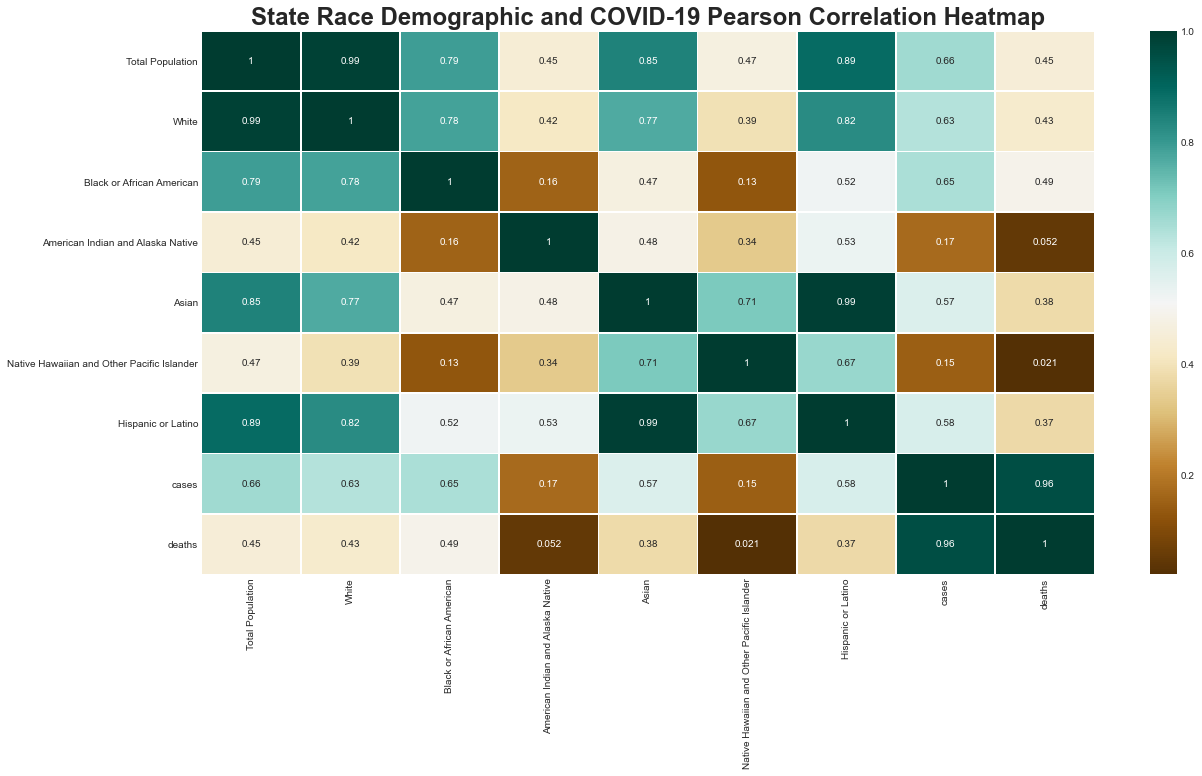

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Kendall Correlation

In [23]:
Kcorr = df.corr(method = 'kendall')
Kcorr

,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino,cases,deaths
Total Population,1.000000,0.927843,0.690980,0.319216,0.703529,0.483922,0.750588,0.716078,0.646528
White,0.927843,1.000000,0.640784,0.331765,0.662745,0.452549,0.700392,0.700392,0.627697
Black or African American,0.690980,0.640784,1.000000,0.198431,0.570196,0.353725,0.570196,0.708235,0.646528
American Indian and Alaska Native,0.319216,0.331765,0.198431,1.000000,0.289412,0.380392,0.367843,0.185882,0.119262
Asian,0.703529,0.662745,0.570196,0.289412,1.000000,0.541961,0.824314,0.667451,0.594743
Native Hawaiian and Other Pacific Islander,0.483922,0.452549,0.353725,0.380392,0.541961,1.000000,0.582745,0.300392,0.213417
Hispanic or Latino,0.750588,0.700392,0.570196,0.367843,0.824314,0.582745,1.000000,0.623529,0.566497
cases,0.716078,0.700392,0.708235,0.185882,0.667451,0.300392,0.623529,1.000000,0.823853
deaths,0.646528,0.627697,0.646528,0.119262,0.594743,0.213417,0.566497,0.823853,1.000000


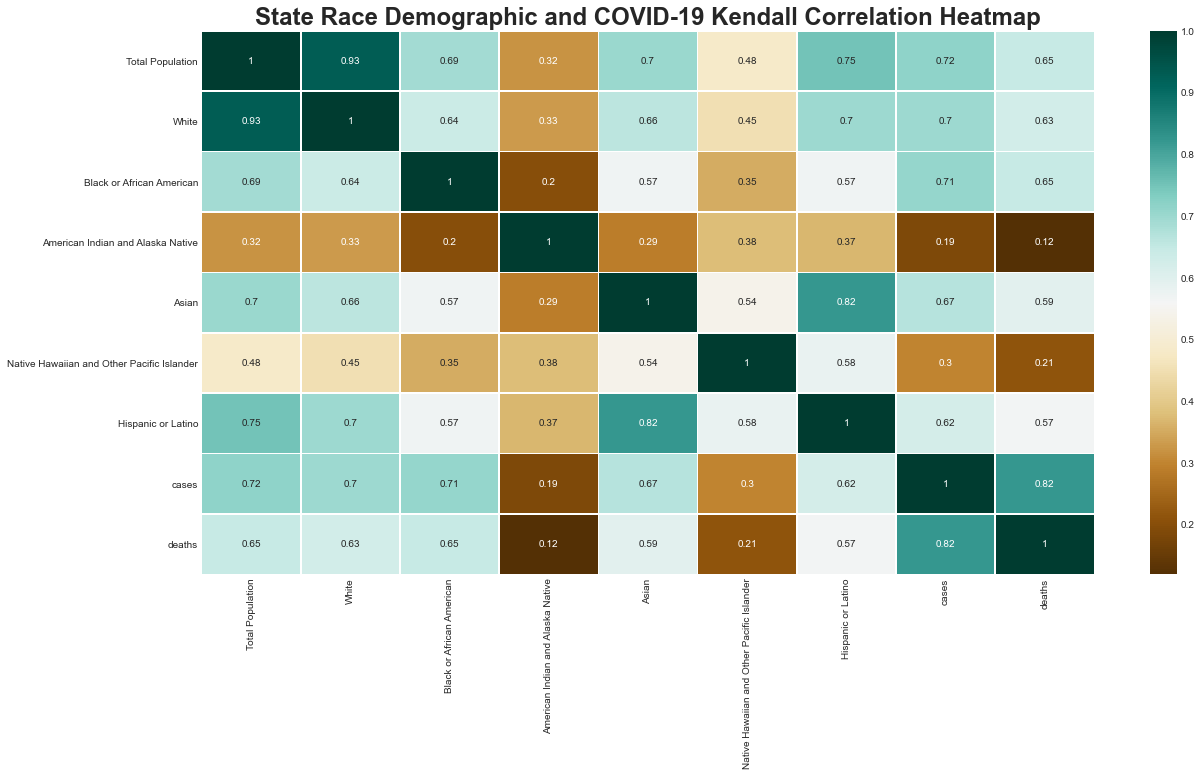

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Spearman Correlation

In [25]:
Scorr = df.corr(method = 'spearman')
Scorr

,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino,cases,deaths
Total Population,1.000000,0.987511,0.872579,0.434480,0.874570,0.637557,0.905249,0.896018,0.837621
White,0.987511,1.000000,0.835837,0.445068,0.826697,0.592941,0.859638,0.876199,0.817485
Black or African American,0.872579,0.835837,1.000000,0.240905,0.748959,0.474842,0.754842,0.889321,0.841422
American Indian and Alaska Native,0.434480,0.445068,0.240905,1.000000,0.380000,0.484525,0.487240,0.253484,0.181226
Asian,0.874570,0.826697,0.748959,0.380000,1.000000,0.733756,0.954389,0.804253,0.757981
Native Hawaiian and Other Pacific Islander,0.637557,0.592941,0.474842,0.484525,0.733756,1.000000,0.767059,0.417919,0.307609
Hispanic or Latino,0.905249,0.859638,0.754842,0.487240,0.954389,0.767059,1.000000,0.807149,0.756623
cases,0.896018,0.876199,0.889321,0.253484,0.804253,0.417919,0.807149,1.000000,0.953189
deaths,0.837621,0.817485,0.841422,0.181226,0.757981,0.307609,0.756623,0.953189,1.000000


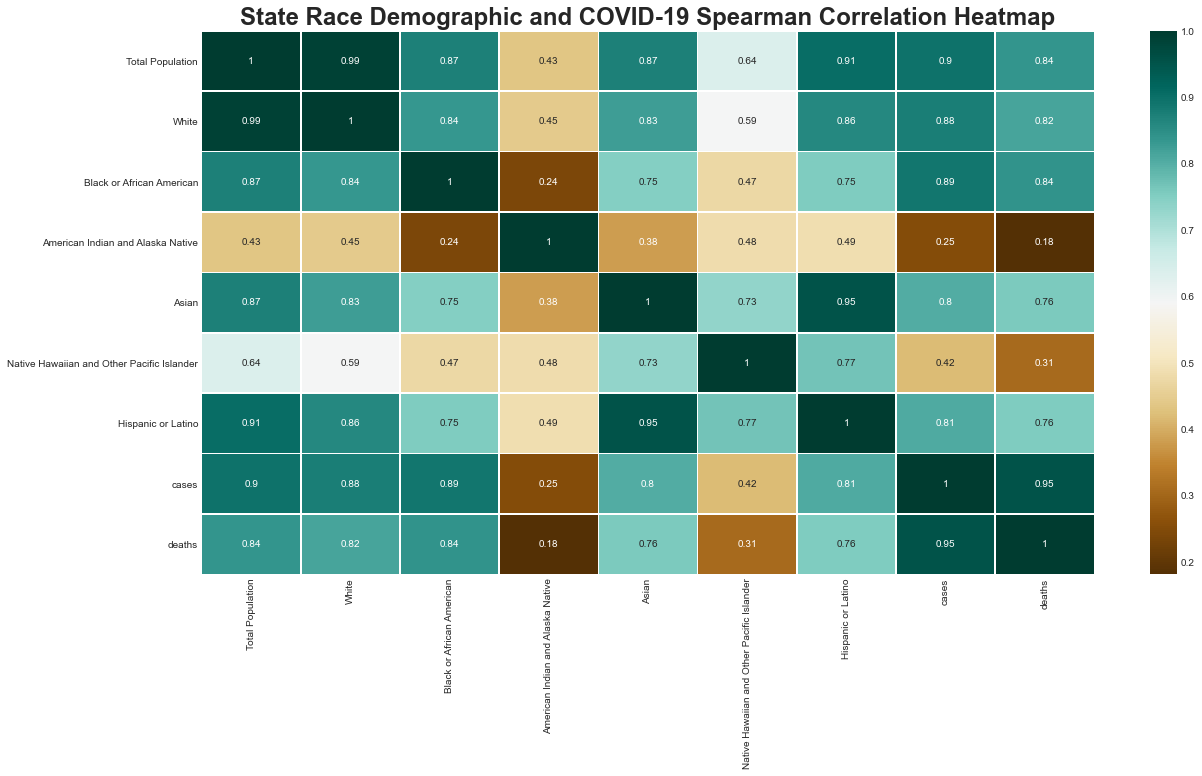

In [26]:
plt.figure(figsize = (20,10))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 24);

In [58]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Ethnicity'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop([7, 8])

AllCorr

,Ethnicity,Pearson Correlation,Kendall Correlation,Spearman Correlation
0,Total Population,0.661893,0.716078,0.896018
1,White,0.634049,0.700392,0.876199
2,Black or African American,0.646511,0.708235,0.889321
3,American Indian and Alaska Native,0.172777,0.185882,0.253484
4,Asian,0.566204,0.667451,0.804253
5,Native Hawaiian and Other Pacific Islander,0.150073,0.300392,0.417919
6,Hispanic or Latino,0.575290,0.623529,0.807149


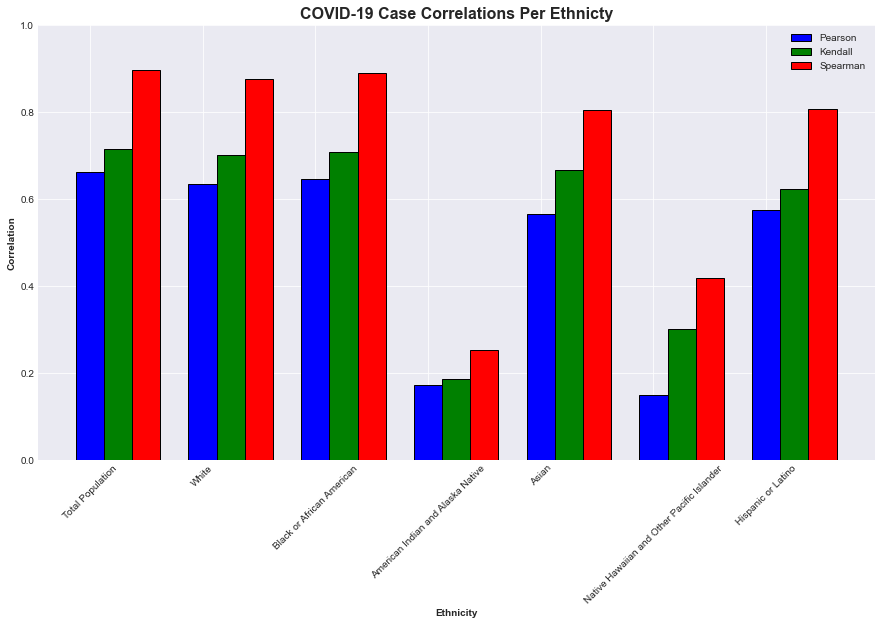

In [69]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['Ethnicity'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Ethnicty', fontsize = 16, fontweight = 'bold')

plt.xlabel('Ethnicity', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

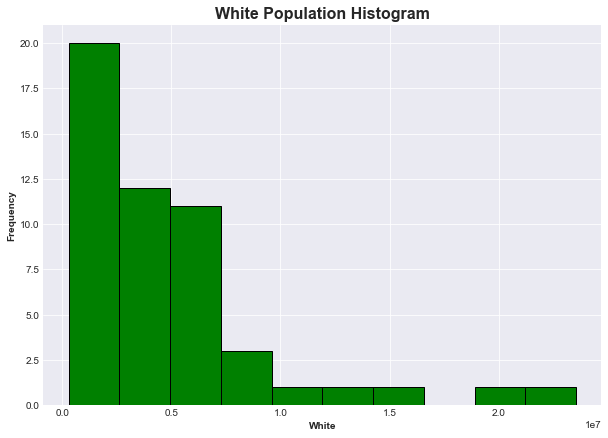

In [18]:
plt.style.use('seaborn-darkgrid')

df['White'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('White Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('White', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

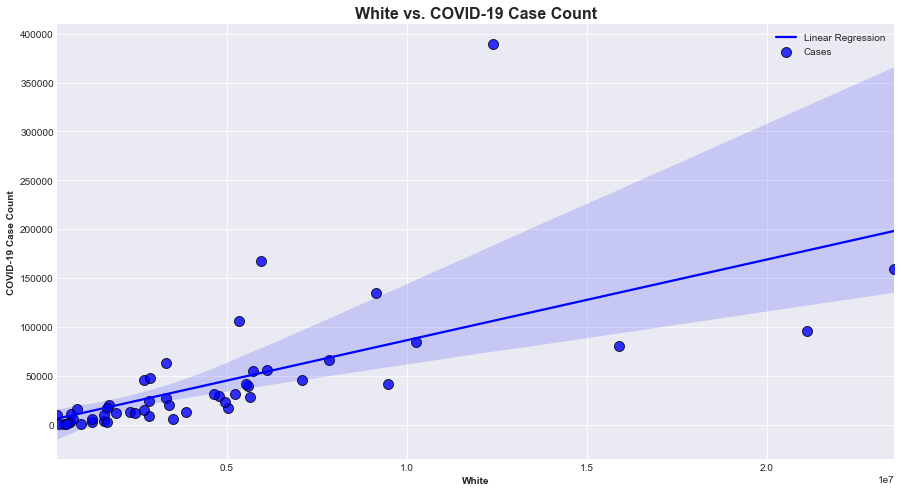

In [24]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'White', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('White vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('White', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [25]:
spearmanr(df['cases'], df['White'])

SpearmanrResult(correlation=0.8761990950226244, pvalue=3.7718107928809123e-17)

In [26]:
model1 = sm.OLS(df['cases'], df['White']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.585
Model:                            OLS   Adj. R-squared (uncentered):              0.577
Method:                 Least Squares   F-statistic:                              70.53
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    4.05e-11
Time:                        00:06:06   Log-Likelihood:                         -622.84
No. Observations:                  51   AIC:                                      1248.
Df Residuals:                      50   BIC:                                      1250.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
White          0.0087      0.001      8.398      0.000       0.007       0.011
==============================================================================
Omnibus:                       74.932   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.586
Skew:                           3.868   Prob(JB):                    9.36e-205
Kurtosis:                      22.553   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

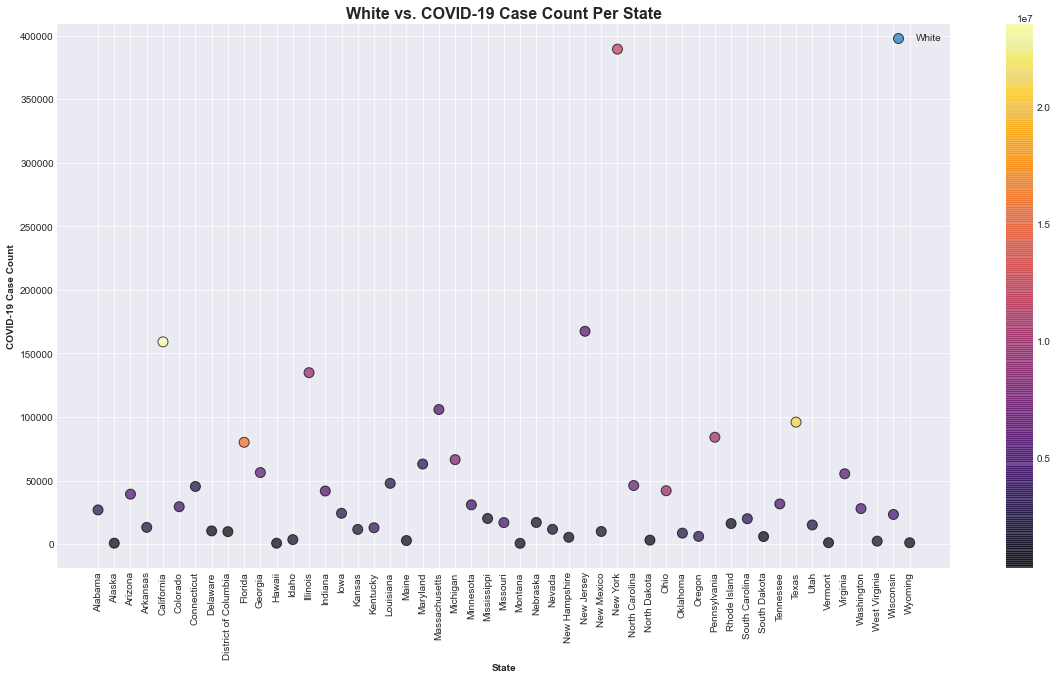

In [27]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['White'], cmap = 'inferno')
plt.title('White vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['White'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

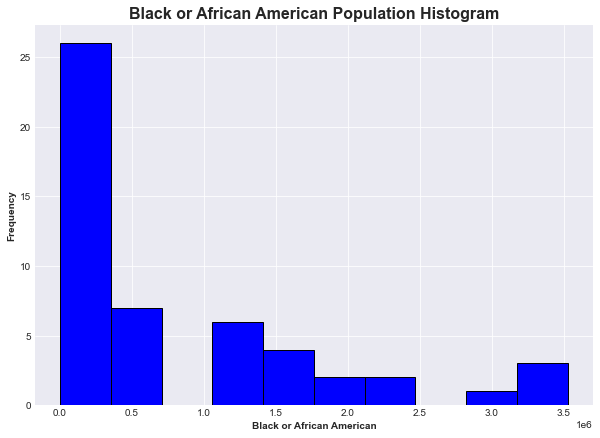

In [19]:
plt.style.use('seaborn-darkgrid')

df['Black or African American'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Black or African American Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Black or African American', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

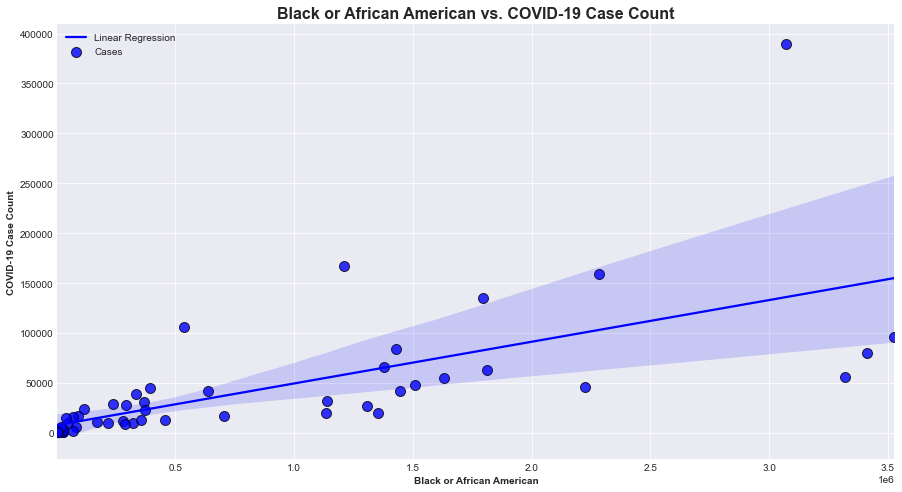

In [28]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Black or African American', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Black or African American vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Black or African American', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [29]:
spearmanr(df['cases'], df['Black or African American'])

SpearmanrResult(correlation=0.8893212669683257, pvalue=2.834054967270533e-18)

In [30]:
model2 = sm.OLS(df['cases'], df['Black or African American']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.591
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              72.26
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    2.83e-11
Time:                        00:06:07   Log-Likelihood:                         -622.47
No. Observations:                  51   AIC:                                      1247.
Df Residuals:                      50   BIC:                                      1249.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Black or African American     0.0458      0.005      8.501      0.000       0.035       0.057
==============================================================================
Omnibus:                       51.424   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           2.485   Prob(JB):                     1.27e-71
Kurtosis:                      14.355   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

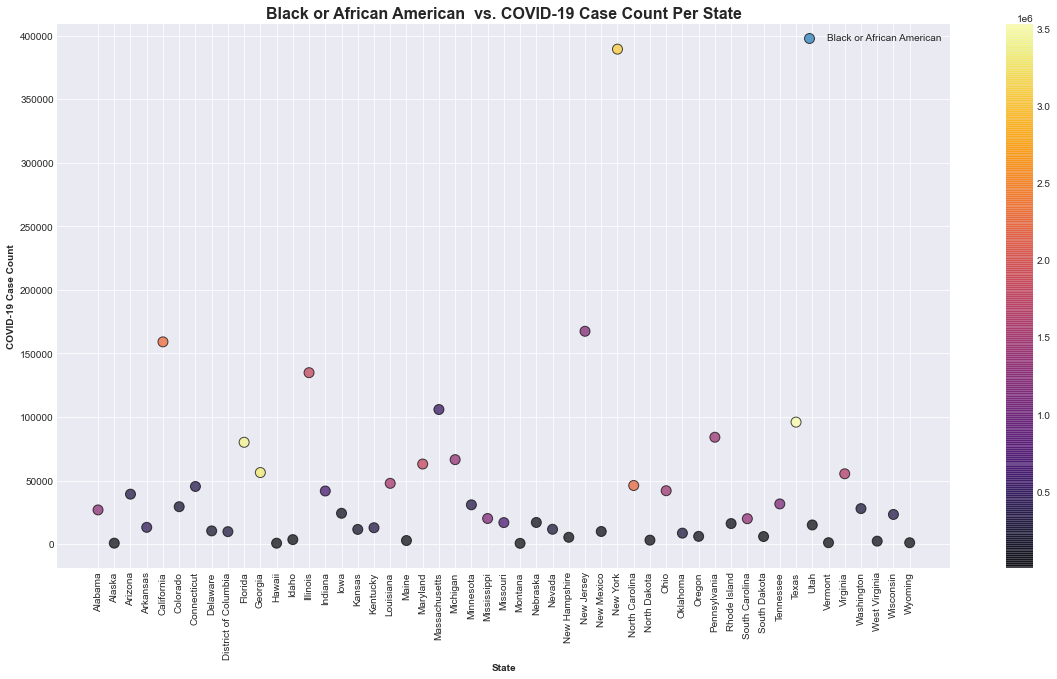

In [31]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Black or African American'], cmap = 'inferno')
plt.title('Black or African American  vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Black or African American'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

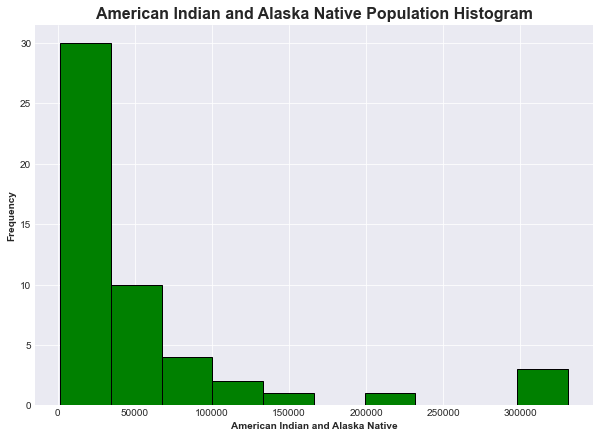

In [20]:
plt.style.use('seaborn-darkgrid')

df['American Indian and Alaska Native'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('American Indian and Alaska Native Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('American Indian and Alaska Native', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

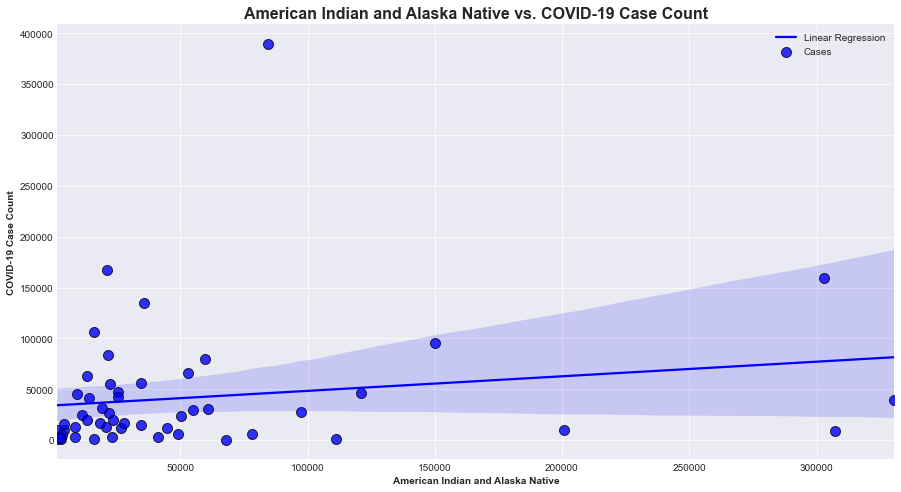

In [32]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'American Indian and Alaska Native', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('American Indian and Alaska Native vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('American Indian and Alaska Native', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [33]:
spearmanr(df['cases'], df['American Indian and Alaska Native'])

SpearmanrResult(correlation=0.25348416289592757, pvalue=0.07268544758614355)

In [34]:
model3 = sm.OLS(df['cases'], df['American Indian and Alaska Native']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.180
Method:                 Least Squares   F-statistic:                              12.17
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                     0.00102
Time:                        00:06:09   Log-Likelihood:                         -639.72
No. Observations:                  51   AIC:                                      1281.
Df Residuals:                      50   BIC:                                      1283.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
American Indian and Alaska Native     0.3576      0.103      3.488      0.001       0.152       0.564
==============================================================================
Omnibus:                       58.121   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.654
Skew:                           2.870   Prob(JB):                     4.13e-95
Kurtosis:                      16.099   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

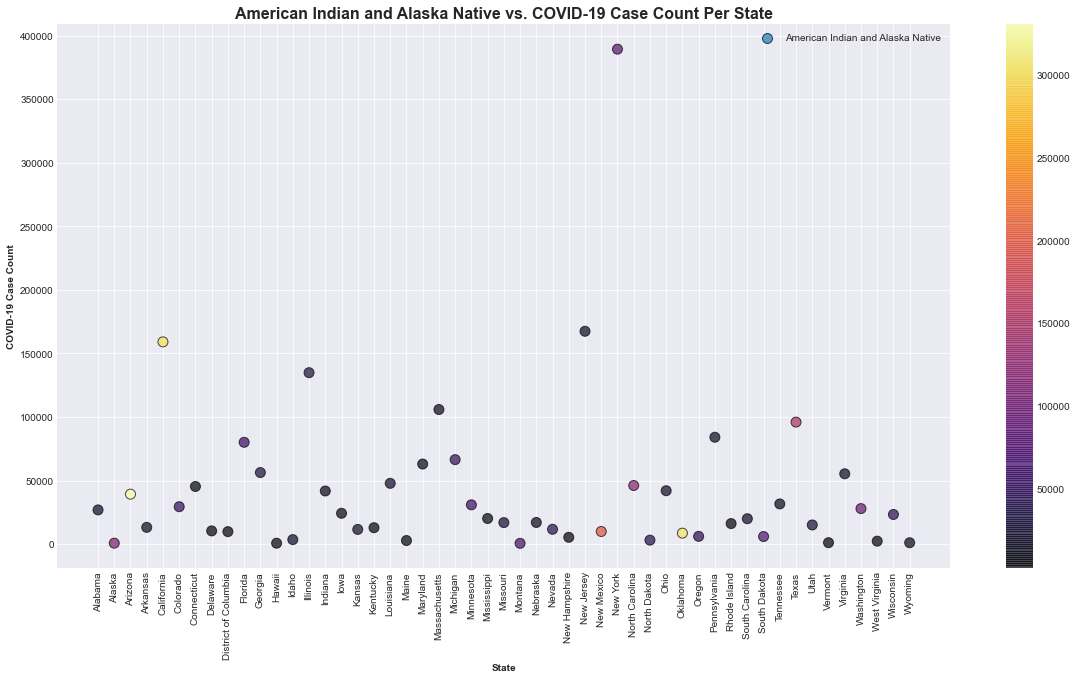

In [35]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['American Indian and Alaska Native'], cmap = 'inferno')
plt.title('American Indian and Alaska Native vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['American Indian and Alaska Native'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

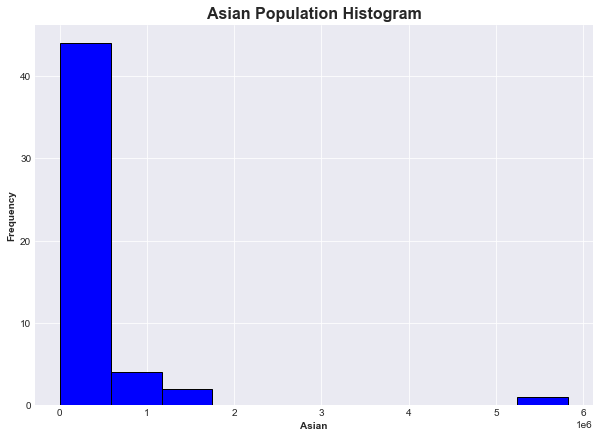

In [21]:
plt.style.use('seaborn-darkgrid')

df['Asian'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Asian Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Asian', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

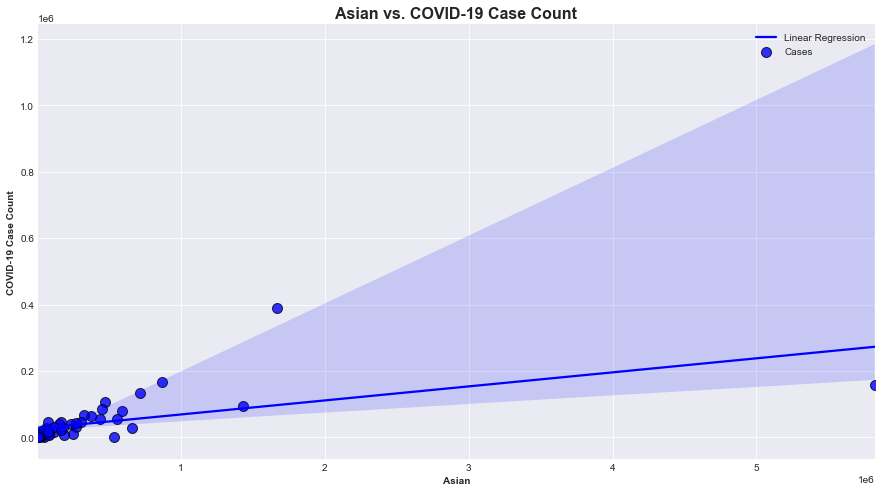

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Asian', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Asian vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Asian', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [37]:
spearmanr(df['cases'], df['Asian'])

SpearmanrResult(correlation=0.8042533936651584, pvalue=1.176239236337126e-12)

In [38]:
model4 = sm.OLS(df['cases'], df['Asian']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.425
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              36.89
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    1.68e-07
Time:                        00:06:10   Log-Likelihood:                         -631.18
No. Observations:                  51   AIC:                                      1264.
Df Residuals:                      50   BIC:                                      1266.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Asian          0.0538      0.009      6.074      0.000       0.036       0.072
==============================================================================
Omnibus:                       52.447   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.401
Skew:                           2.292   Prob(JB):                    1.47e-111
Kurtosis:                      17.805   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

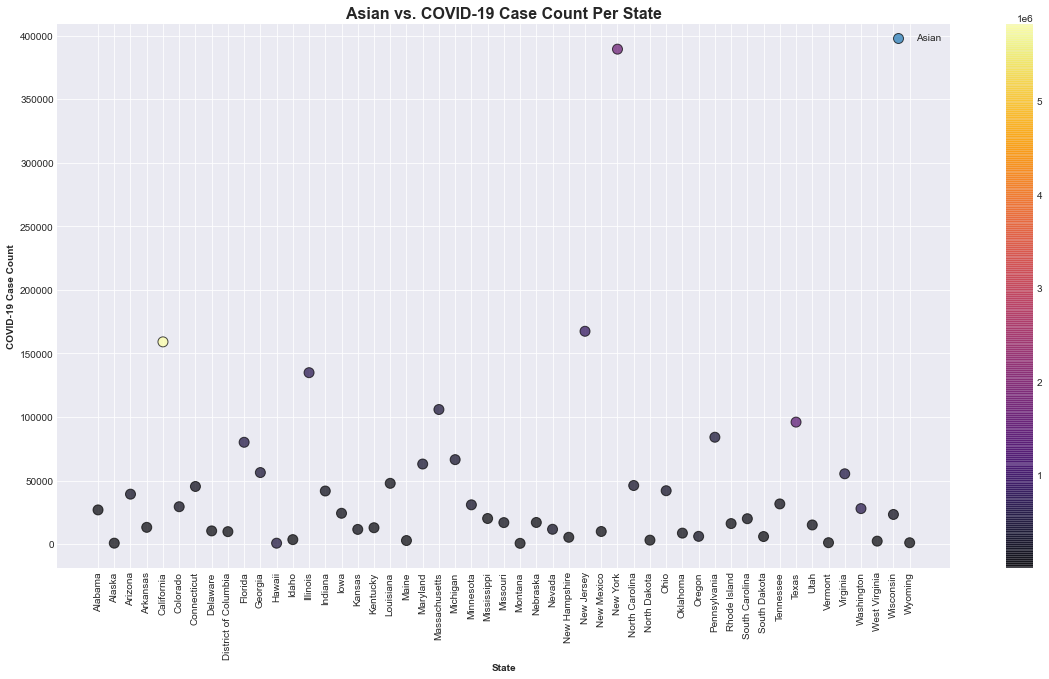

In [39]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Asian'], cmap = 'inferno')
plt.title('Asian vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Asian'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

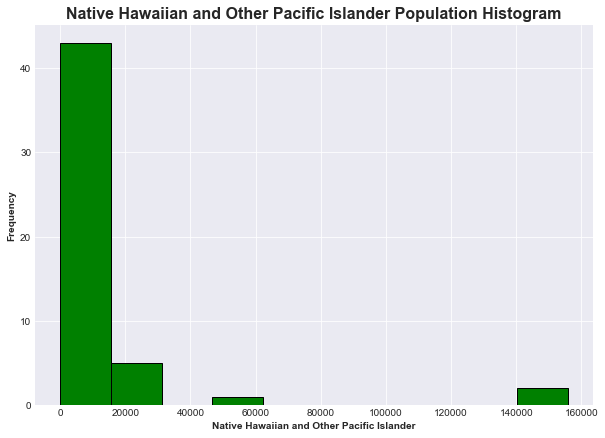

In [22]:
plt.style.use('seaborn-darkgrid')

df['Native Hawaiian and Other Pacific Islander'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Native Hawaiian and Other Pacific Islander Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Native Hawaiian and Other Pacific Islander', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

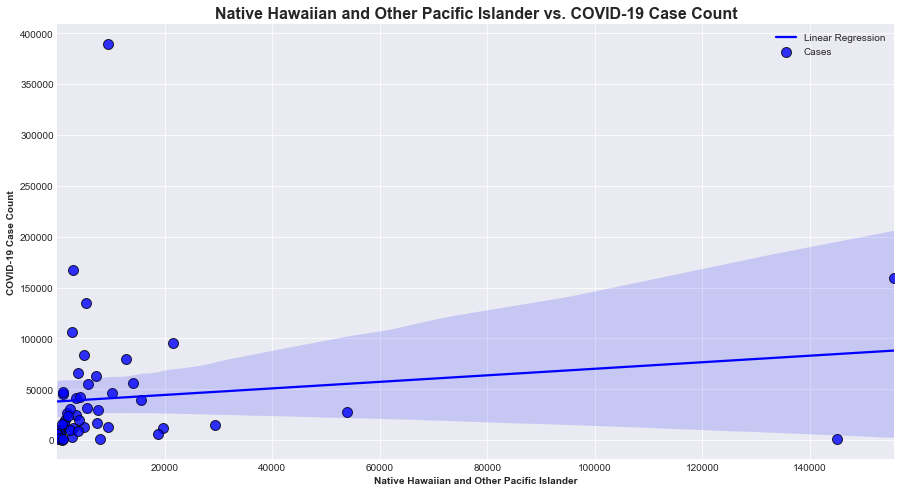

In [40]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Native Hawaiian and Other Pacific Islander', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Native Hawaiian and Other Pacific Islander vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Native Hawaiian and Other Pacific Islander', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [41]:
spearmanr(df['cases'], df['Native Hawaiian and Other Pacific Islander'])

SpearmanrResult(correlation=0.4179185520361991, pvalue=0.0022767748893992713)

In [42]:
model5 = sm.OLS(df['cases'], df['Native Hawaiian and Other Pacific Islander']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.091
Method:                 Least Squares   F-statistic:                              6.084
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                      0.0171
Time:                        00:06:11   Log-Likelihood:                         -642.34
No. Observations:                  51   AIC:                                      1287.
Df Residuals:                      50   BIC:                                      1289.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Native Hawaiian and Other Pacific Islander     0.7827      0.317      2.467      0.017       0.145       1.420
==============================================================================
Omnibus:                       65.475   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.466
Skew:                           3.267   Prob(JB):                    7.57e-138
Kurtosis:                      18.952   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

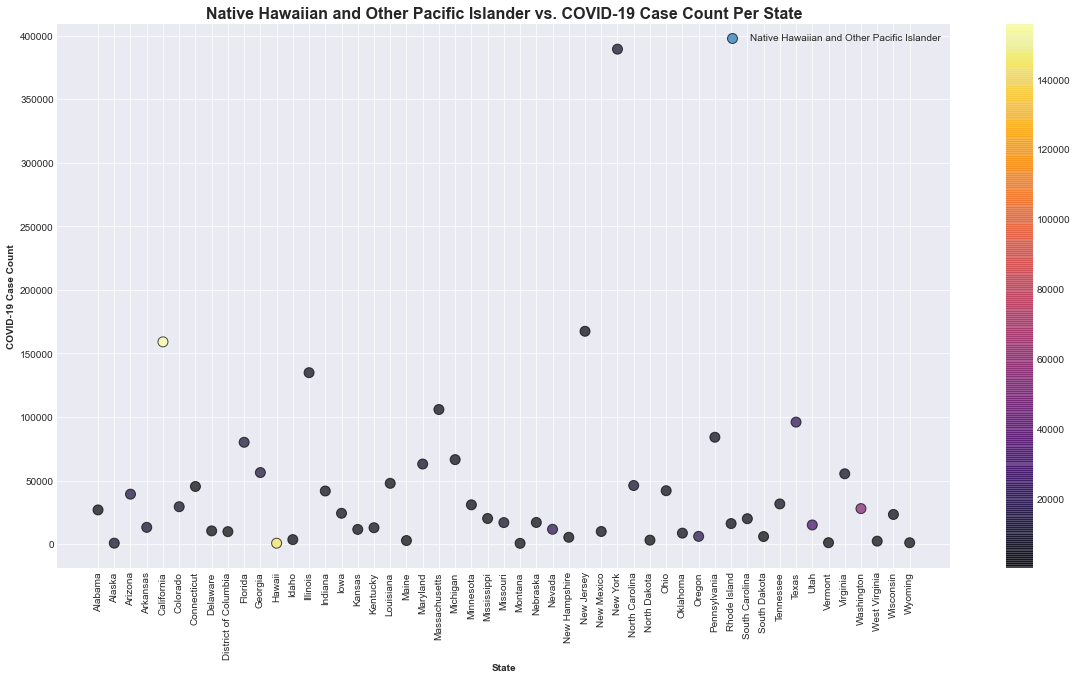

In [43]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Native Hawaiian and Other Pacific Islander'], cmap = 'inferno')
plt.title('Native Hawaiian and Other Pacific Islander vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Native Hawaiian and Other Pacific Islander'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

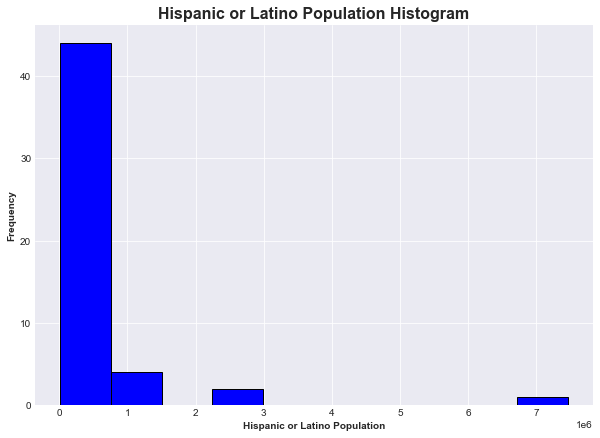

In [23]:
plt.style.use('seaborn-darkgrid')

df['Hispanic or Latino'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Hispanic or Latino Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hispanic or Latino Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

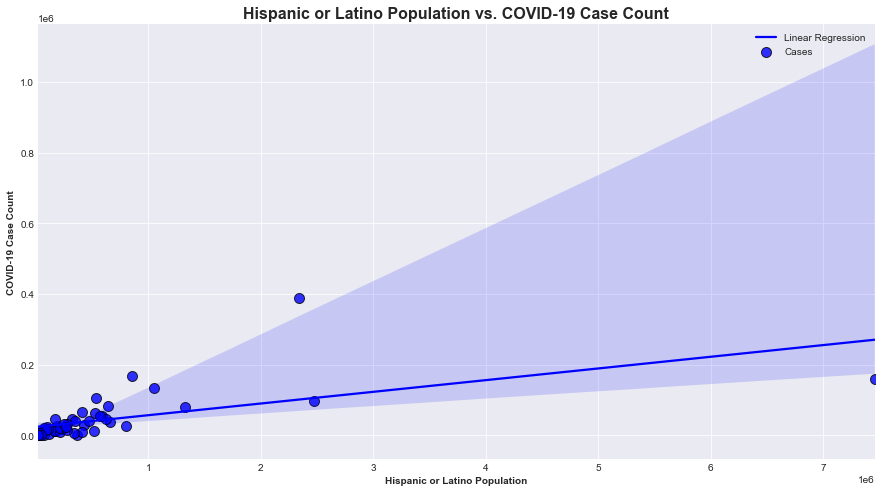

In [44]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Hispanic or Latino', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Hispanic or Latino Population vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hispanic or Latino Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [45]:
spearmanr(df['cases'], df['Hispanic or Latino'])

SpearmanrResult(correlation=0.8071493212669683, pvalue=8.462501618742135e-13)

In [46]:
model6 = sm.OLS(df['cases'], df['Hispanic or Latino']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.444
Method:                 Least Squares   F-statistic:                              41.78
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    4.15e-08
Time:                        00:06:12   Log-Likelihood:                         -629.79
No. Observations:                  51   AIC:                                      1262.
Df Residuals:                      50   BIC:                                      1264.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Hispanic or Latino     0.0418      0.006      6.464      0.000       0.029       0.055
==============================================================================
Omnibus:                       52.363   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.171
Skew:                           2.328   Prob(JB):                    6.58e-104
Kurtosis:                      17.211   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

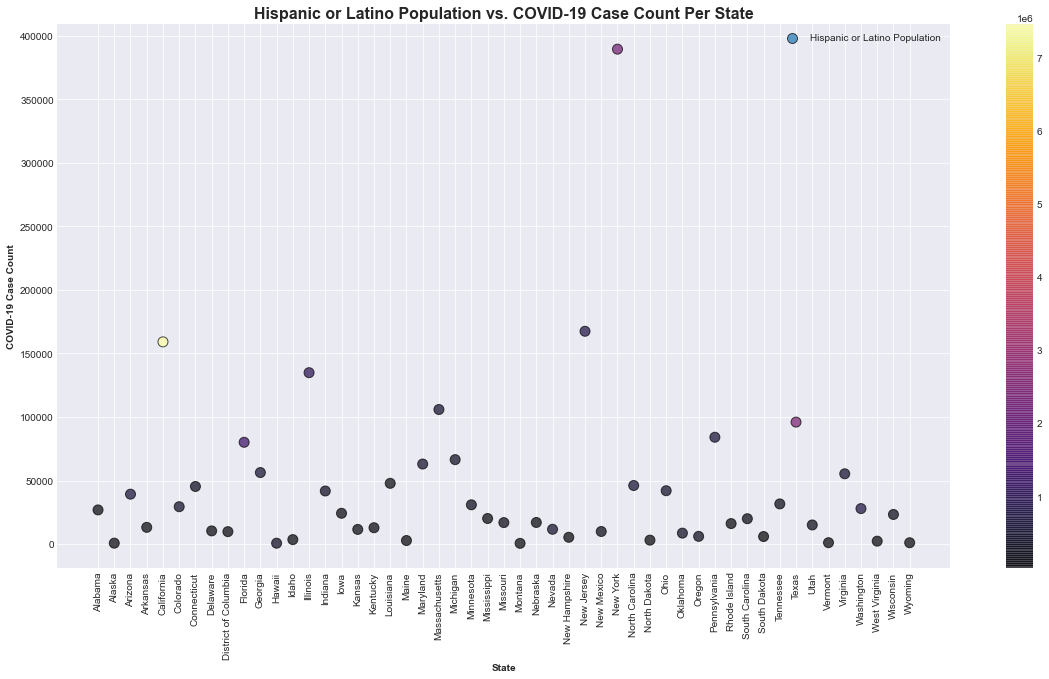

In [47]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Hispanic or Latino'], cmap = 'inferno')
plt.title('Hispanic or Latino Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Hispanic or Latino Population'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [48]:
model7 = sm.OLS(df['cases'], df[['White','Black or African American','American Indian and Alaska Native','Asian',
                 'Native Hawaiian and Other Pacific Islander','Hispanic or Latino']]).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              17.89
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    1.79e-10
Time:                        00:11:37   Log-Likelihood:                         -614.18
No. Observations:                  51   AIC:                                      1240.
Df Residuals:                      45   BIC:                                      1252.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
White                                          0.0038      0.003      1.173      0.247      -0.003       0.010
Black or African American                      0.0299      0.011      2.689      0.010       0.008       0.052
American Indian and Alaska Native              0.0824      0.104      0.796      0.430      -0.126       0.291
Asian                                          0.1840      0.074      2.475      0.017       0.034       0.334
Native Hawaiian and Other Pacific Islander    -0.7521      0.313     -2.403      0.020      -1.383      -0.122
Hispanic or Latino                            -0.1225      0.062     -1.967      0.055      -0.248       0.003
==============================================================================
Omnibus:                       63.865   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.641
Skew:                           3.133   Prob(JB):                    1.70e-135
Kurtosis:                      18.900   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""